# Modelo Perceptron
![Python](https://img.shields.io/badge/python-3.x-orange.svg)
![Type](https://img.shields.io/badge/Machine-Learning-red.svg) ![Type](https://img.shields.io/badge/Type-Supervised-yellow.svg)
![Status](https://img.shields.io/badge/Status-Completed-yellowgreen.svg)

Neste tutorial iremos elaborar um modelo de aprendizagem **Supervisionada** chamado perceptron simples. Iremos utilizar os dados do dataset iris, mais especificamente os dados de duas tipagem de plantas, a Iris Setosa e a Iris versicolor.Estamos utilizando dois dados de saída pois iremos fazer uma análise de classificação linear simples, ou seja, com a função de ativação degrau bipolar. Como estamos utilizando um regressão simples, iremos utilizar apenas duas características de entradas de dados. Comprimento da Sepala e Comprimento da Petala.


### Modelo:

<a href="https://imgur.com/HPRdoda"><img src="https://i.imgur.com/HPRdoda.png" title="source: imgur.com" /></a>

### Iris Data Set
### Informações dos dados:

```
0. sepal length in cm = Comprimento da Sepala [SepalLengthCm]
1. sepal width in cm  = Largura da Sepala [SepalWidthCm]
2. petal length in cm = Comprimento da Petala [PetalLengthCm]
3. petal width in cm  = Larguta da Petala [PetalWidthCm]

4. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
````

**Iremos utilizar:**

Iris Setosa 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando o conjunto iris dataset do link oficial
dataIris = pd.read_csv('https://raw.githubusercontent.com/Jonathan-geo/perceptron-simples/master/Iris.csv')

In [3]:
dataIris[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataIris=dataIris.drop(columns=['Id'])

In [5]:
dataIris.shape

(150, 5)

In [6]:
dataIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Obtendo o vetor de alvos [y]  Iris Setosa e Iris versicolor.
y = dataIris.iloc[0:100, 4].values

In [8]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
y.shape

(100,)

In [10]:
#Atribuindo um rótulo (numérico) as saídas. 
#Iris Setosa == -1 e Iris versicolorm 1. 
y = np.where(y == 'Iris-setosa', -1, 1)

In [11]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
#Separendo a variável de entrada do modelo. Comprimento da sepala e da petala.
#SepalLengthCm
#PetalLengthCm
x = dataIris.iloc[0:100, [0, 2]].values

In [13]:
x[0:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

In [14]:
# Adicionando a coluna do bias (necessário em algoritmos baseados em perceptron/gradiente)
x = np.c_[np.ones(x.shape[0]), x]

In [15]:
x[0:10]

array([[1. , 5.1, 1.4],
       [1. , 4.9, 1.4],
       [1. , 4.7, 1.3],
       [1. , 4.6, 1.5],
       [1. , 5. , 1.4],
       [1. , 5.4, 1.7],
       [1. , 4.6, 1.4],
       [1. , 5. , 1.5],
       [1. , 4.4, 1.4],
       [1. , 4.9, 1.5]])

In [16]:
x.shape

(100, 3)

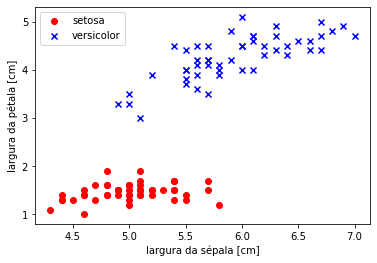

In [17]:
# Visualizando os dados (estamos pulando a coluna do bias)
plt.scatter(x[:50, 1], x[:50, 2],
            color='red', marker='o', label='setosa')

plt.scatter(x[50:100, 1], x[50:100, 2],
             color='blue', marker='x', label='versicolor')

plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left') 
plt.show()

In [18]:
#Dividindo o dataset em treino e teste. 
from sklearn import model_selection

# Split em conjunto de treino e teste
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
x_train[:5]

array([[1. , 5. , 1.6],
       [1. , 6. , 4. ],
       [1. , 4.6, 1.5],
       [1. , 6.1, 4. ],
       [1. , 4.8, 1.4]])

In [20]:
x_train.shape

(80, 3)

In [21]:
y_train

array([-1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1])

In [22]:
y_train.shape

(80,)

In [23]:
#Função do ŷ ou h
def h(x, thetas):
    #A função dot faz multiplicação de matriz
    #x.dot(thetas) é o mesmo que Σ(Xi.Wi)
    #a função where faz o papel da função degrau. Se o 
    #output de x.dot(thetas) for maior que 0.0 retorne 1
    #se for menor retorne -1. 
    return np.where(x.dot(thetas) >= 0.0, 1, -1)

In [24]:
def perceptron(x, y, iterations, alpha):
    #Definindo os pesos = array([0., 0., 0.])
    thetas = np.zeros(x_train.shape[1])
    #Repetir por dez (por exemplo) vezes
    for i in range(iterations):
        #Para cada entrada x e saída y. 
        for xi, yi in zip(x_train, y_train):
            #Fórmula do perceptron para ajuste dos pesos
            # [w = w + α * Et . xi]
            # [Et = yi - ŷ]  para ŷ = h 
            # ŷ ou h (é o y estimado, ou seja, )
            thetas = thetas + alpha * (yi - h(xi, thetas)) * xi
    return thetas

In [25]:
# Treinando nosso modelo...
#Iterações
iterations = 10 
#Coef-Aprend
alpha = 0.01
#Chamada-Func
#Thetas é o mesmo que pesos ou w
thetas = perceptron(x_train, y_train, iterations, alpha)

In [26]:
#Pesos de W balanceados. (Uma analogia com a 'Equação da reta')
thetasFinal = thetas
print(thetasFinal)

[-0.04  -0.112  0.216]


In [27]:
x_test.shape

(20, 3)

In [28]:
x_test

array([[1. , 5. , 1.6],
       [1. , 6.7, 4.7],
       [1. , 4.7, 1.3],
       [1. , 5.7, 4.5],
       [1. , 6.6, 4.4],
       [1. , 5. , 3.3],
       [1. , 5.4, 1.3],
       [1. , 6.1, 4.7],
       [1. , 6.5, 4.6],
       [1. , 5.7, 4.2],
       [1. , 5.5, 4. ],
       [1. , 5.8, 4. ],
       [1. , 6. , 4.5],
       [1. , 4.3, 1.1],
       [1. , 5. , 1.5],
       [1. , 4.8, 1.6],
       [1. , 4.6, 1. ],
       [1. , 4.8, 1.9],
       [1. , 5.5, 1.4],
       [1. , 4.4, 1.4]])

In [29]:
y_test

array([-1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1])

In [30]:
#Teste
def hFinal(x_test, thetasFinal):
  return np.where(x_test.dot(thetasFinal) >= 0.0, 1, -1)

In [31]:
y_est = hFinal(x_test, thetasFinal)

In [32]:
#Acertos
y_est == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Considerações Finais

Podemos observar que ao descobrir os pesos balanceados [-0.04  -0.112  0.216] o modelo pode acertar todoas as nossos dados de teste. 

Referencias:

- Python Machine Learn - Sebastian Raschka https://www.amazon.com.br/Python-Machine-Learning-Sebastian-Raschka/dp/1789955750/ref=pd_sbs_14_t_0/146-7290337-7783406?_encoding=UTF8&pd_rd_i=1789955750&pd_rd_r=5750d573-f6c1-4f84-acf3-a26698a9fa4c&pd_rd_w=RXeqA&pd_rd_wg=5MTyX&pf_rd_p=adb10074-dc46-4d48-9abd-ebbbd99776aa&pf_rd_r=5X5JXYVPCJ010JQ0EEV3&psc=1&refRID=5X5JXYVPCJ010JQ0EEV3

- http://wiki.icmc.usp.br/images/7/7b/Perceptron.pdf

- https://juliocprocha.blog/2017/07/27/perceptron-para-classificacao-passo-a-passo/

# Perceptron Simples - Modelo II

Neste segundo modelo iremos fazer o uso de um modo mais manual de elaboração, neste sentido poderemos ver com mais detalhe o funcionamento do algorítmo Perceptron.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#Criando um array de valores x1 
peso = np.array([113, 98, 107, 122, 115, 120])
peso

array([113,  98, 107, 122, 115, 120])

In [35]:
#Criando um array de valores x2
ph = np.array([6.8, 3.6, 5.2, 4.7, 2.9, 4.2])
ph

array([6.8, 3.6, 5.2, 4.7, 2.9, 4.2])

In [36]:
# Unindo os atributos em uma matriz (X)
X = np.vstack((peso, ph))
X

array([[113. ,  98. , 107. , 122. , 115. , 120. ],
       [  6.8,   3.6,   5.2,   4.7,   2.9,   4.2]])

In [37]:
X.shape

(2, 6)

## Métodos de Seleção de dado em Array

In [38]:
X

array([[113. ,  98. , 107. , 122. , 115. , 120. ],
       [  6.8,   3.6,   5.2,   4.7,   2.9,   4.2]])

In [39]:
X[:1, :3]

array([[113.,  98., 107.]])

In [40]:
X[1:2, :3]

array([[6.8, 3.6, 5.2]])

In [41]:
X[:1, 3:]

array([[122., 115., 120.]])

In [42]:
X[1:2, 3:]

array([[4.7, 2.9, 4.2]])

## Visualização dos Dados

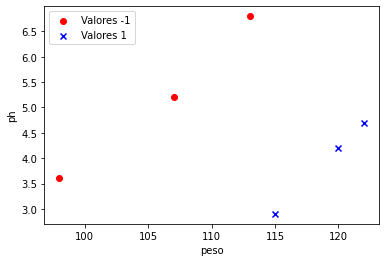

In [43]:
# Visualizando os dados (estamos pulando a coluna do bias)
plt.scatter(X[:1, :3], X[1:2, :3],
color='red', marker='o', label='Valores -1')

plt.scatter(X[:1, 3:], X[1:2, 3:],
color='blue', marker='x', label='Valores 1')

plt.xlabel('peso')
plt.ylabel('ph')
plt.legend(loc='upper left')
plt.show()

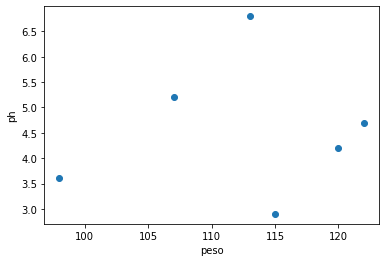

In [44]:
# Visualização Simples
plt.scatter(X[0], X[1])
plt.xlabel('peso')
plt.ylabel('ph')
plt.show()

## Preparando o Algoritmo 

In [45]:
# Resultados esperados (Y)
y = np.array([-1, -1, -1, 1, 1, 1])
y

array([-1, -1, -1,  1,  1,  1])

In [46]:
# Vetor de Pesos (Treino)
W = np.zeros([1,3])
W

array([[0., 0., 0.]])

In [47]:
# Array para armazenar os erros
e = np.zeros(12)
e

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
def funcaoAtivacao(valor):
  # Função de ativação (degrau bipolar)
  if valor < 0.0:
    return (-1)
  else:
    return (1)

In [49]:
# Define o número de épocas (repetições).
numEpocas = 2

# Número de linhas a percorrer (relativo ao tamanho do dataset)
# X.shape retorno o shape do dataset (2,6) 
q = X.shape[1]

# Theta 
bias = 1


# n = eta = Taxa de aprendizado
eta = 0.1


for j in range(numEpocas): # Repetir relativo ao numero de epocas
  for k in range(q): # Para cada época repetir todas as 6 "linhas" 
    # insere o bias no vetor de entrada (para cada repetição)
    xb = np.hstack((bias, X[:,k]))
    print("este é o xb(inserindo Bias no vetor de entrada)...............", xb)
    print("este é o W(vetor de pesos)....................................", W)

    # Calcular o campo induzido (Multiplicação Vetorial)
    V = np.dot(W, xb)
    print("este é o V(multiplicação/soma vetorial (pesos x entradas))....", V)
    


    # Calcular a saída perseptron 
    Yr = funcaoAtivacao(V)
    print("este é o Yr(pega o V e passa pela função ativação)............", Yr)


    # Calculo do erro: e = (Y - Yr)
    e[k] = y[k] - Yr
    print("este é o y[k](Valor de Y real (Yr))...........................", y[k])
    print("este é o e[k](Cálculo do erro (Y - Yr)).......................", e[k])


    # Treinamento do Perceptron
    W = W + eta*e[k]*xb
    print("este é o W(pesos corrigido (W = W + eta*e[k]*xb)).............", W)
    print("")
    print("-------------------------------loop---------------------------------")
    print("")
print("vetor de erros (e) = " + str(e))

este é o xb(inserindo Bias no vetor de entrada)............... [  1.  113.    6.8]
este é o W(vetor de pesos).................................... [[0. 0. 0.]]
este é o V(multiplicação/soma vetorial (pesos x entradas)).... [0.]
este é o Yr(pega o V e passa pela função ativação)............ 1
este é o y[k](Valor de Y real (Yr))........................... -1
este é o e[k](Cálculo do erro (Y - Yr))....................... -2.0
este é o W(pesos corrigido (W = W + eta*e[k]*xb))............. [[ -0.2  -22.6   -1.36]]

-------------------------------loop---------------------------------

este é o xb(inserindo Bias no vetor de entrada)............... [ 1.  98.   3.6]
este é o W(vetor de pesos).................................... [[ -0.2  -22.6   -1.36]]
este é o V(multiplicação/soma vetorial (pesos x entradas)).... [-2219.896]
este é o Yr(pega o V e passa pela função ativação)............ -1
este é o y[k](Valor de Y real (Yr))........................... -1
este é o e[k](Cálculo do erro (Y - Yr)).